# load model

In [2]:
import matplotlib.pyplot as plt
import torch
from vit import ViT

# a)

In [6]:

def test():
    v = ViT(
        image_size = 256,
        patch_size = 32,
        num_classes = 1000,
        dim = 1024,
        depth = 6,
        heads = 16,
        mlp_dim = 2048,
        dropout = 0.1,
        emb_dropout = 0.1
    )

    img = torch.randn(1, 3, 256, 256)

    preds = v(img)
    assert preds.shape == (1, 1000), 'correct logits outputted'
    return preds

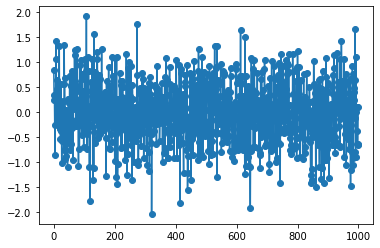

In [7]:
preds = test().detach().numpy().T
plt.plot( preds, 'o-')

In [8]:
from torch.nn import Softmax
probabilities = Softmax(dim = 0)(torch.tensor(preds))

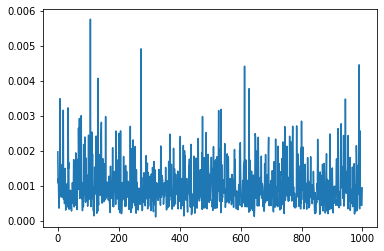

In [9]:
plt.plot(probabilities)

In [10]:
print("hello")

hello


# b)

In [3]:
model = ViT(
        image_size = 32,
        patch_size = 4,
        num_classes = 10, # 10 classes for CIFAR-10
        dim =  8,  # patch after embedding
        depth = 4, # number of attention layers
        heads = 16, 
        mlp_dim = 16,
        dropout = 0.1,
        emb_dropout = 0.1
    )

In [4]:
# load cifar10
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

transform = transforms.Compose(
    [transforms.ToTensor(),])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)     
trainloader = DataLoader(trainset, batch_size=4,
                                            shuffle=True, num_workers=2)                
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                        download=True, transform=transform)                         
testloader = DataLoader(testset, batch_size=4,
                                            shuffle=False, num_workers=2)           
classes = ('plane', 'car', 'bird', 'cat',   
            'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

            

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
# train the model on cifar10
import torch.optim as optim
import torch.nn as nn
# import tqdm

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

for epoch in range(1):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # print(i,end=' ')

        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
        if i == 1000:
            break

print('Finished Training')



In [27]:
# test the model on cifar10
import torch.optim as optim
import torch.nn as nn
# import tqdm

correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))
    

Accuracy of the network on the 10000 test images: 27 %


In [ ]:
len(tra)